In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\Jilla.Kishoran\\Desktop\\Python Projects for DA\\Bank Customer Churn prediction'

In [3]:
df = pd.read_csv("C:\\Users\\Jilla.Kishoran\\Desktop\\Python Projects for DA\\Bank Customer Churn prediction\\Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.select_dtypes(include=[np.number]).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
pd.DataFrame(df.isnull().sum(),columns=['Missing values count'])

,Missing values count
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:

df.groupby('Geography')[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [13]:

df.groupby('Gender')[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']].mean()
     

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [14]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

def countplot(col,figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=df[col],data=df,palette='Spectral')
    plt.title(f'{col} Countplot',fontdict=title_font)
    plt.xlabel(f'{col}',fontdict=axis_font)
    plt.ylabel("Count",fontdict=axis_font)
    plt.show()
    

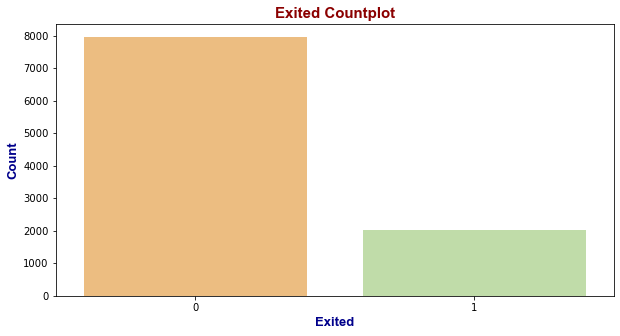

In [15]:
countplot('Exited')

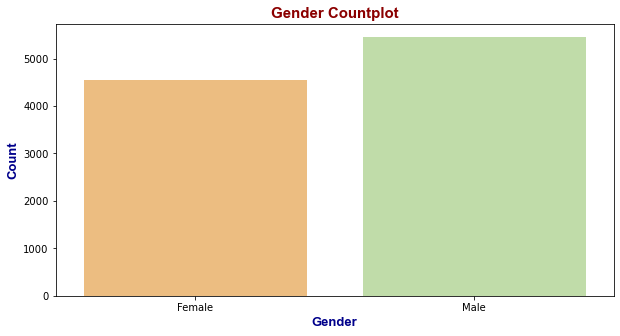

In [16]:
countplot('Gender')

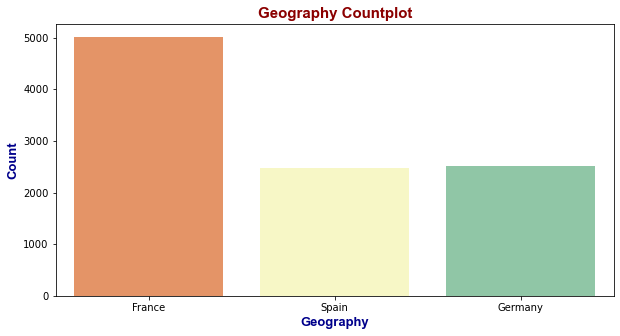

In [17]:
countplot('Geography')

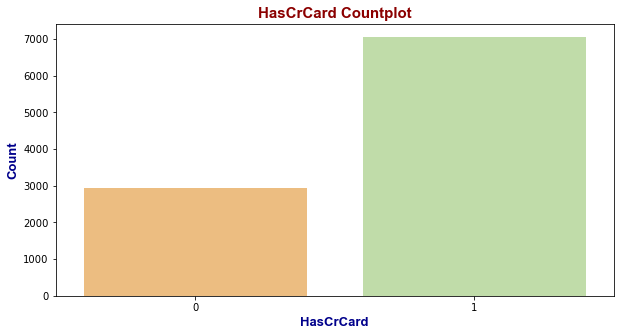

In [18]:
countplot('HasCrCard')

In [19]:
def histogram(col,figsize=(10,5),bins='auto'):
    plt.figure(figsize=figsize)
    sns.set_style('darkgrid')
    sns.histplot(df[col],color='b',bins=bins,kde=True)
    plt.title(f"{col}'s Distribution",fontdict=title_font)
    plt.show()

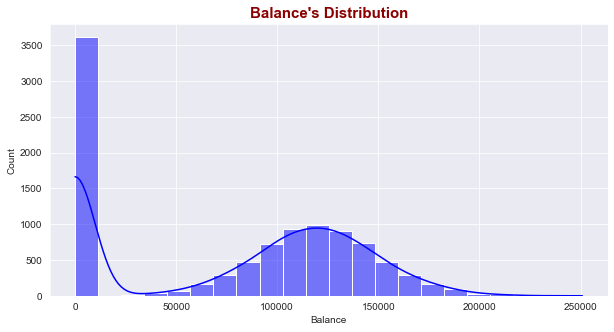

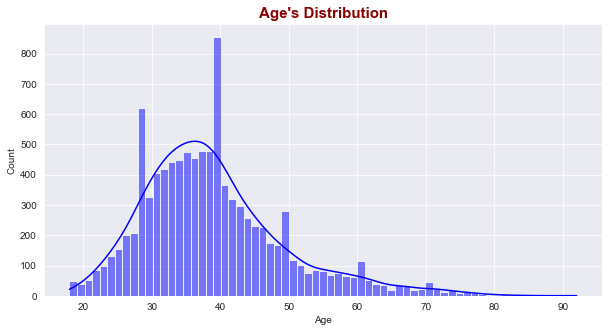

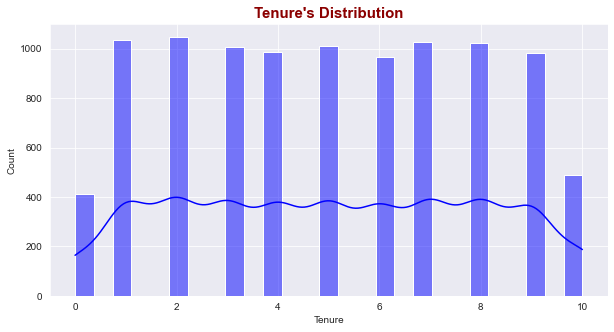

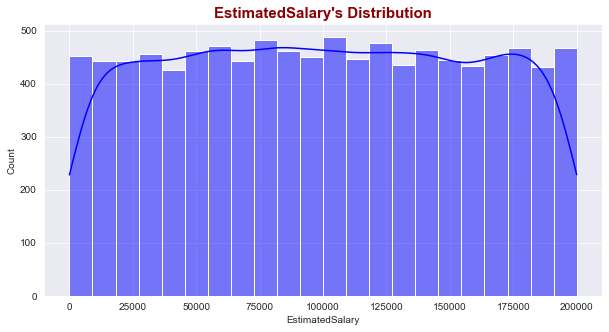

In [20]:
columns = ['Balance','Age','Tenure','EstimatedSalary']
for col in columns:
    histogram(col)

In [21]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [24]:
pd.DataFrame(df['Gender'].unique(), columns=['Gender'])

,Gender
0,Female
1,Male


In [25]:

pd.DataFrame(df['Geography'].unique(), columns=['Geography'])

,Geography
0,France
1,Spain
2,Germany


In [26]:
one_hot = pd.get_dummies(df[['Geography','Gender']])

In [27]:
one_hot

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [28]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [29]:
df2 = df1.drop(columns = ['Exited'])
df2.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,0,0,0


<AxesSubplot:title={'center':'Correlation with Exited'}>

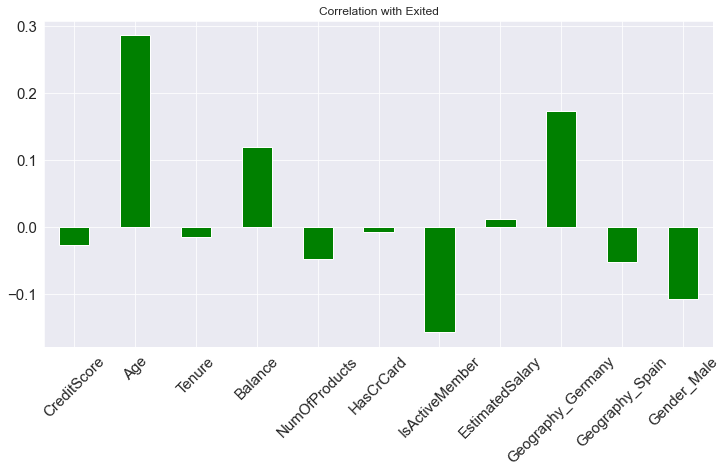

In [30]:
df2.corrwith(df['Exited']).plot.bar(
    figsize=(12, 6), title="Correlation with Exited", fontsize=15,
    rot=45, grid=True, color='g'
)

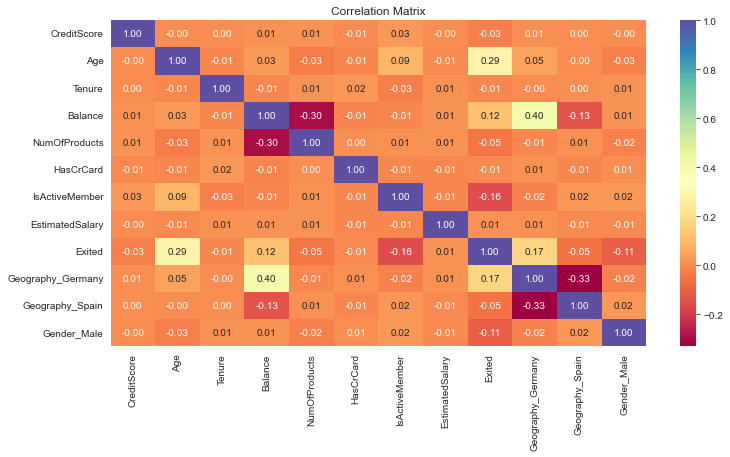

In [31]:
df_corr = df1.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
df1.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [33]:
X = df1.drop(columns=['Exited'],axis=1).values
y = df1['Exited'].values

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (10000, 11)
Shape of y:  (10000,)


In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Check Shape of Train & Test sets
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (8000, 11)
X_test Shape:  (2000, 11)
y_train Shape:  (8000,)
y_test Shape:  (2000,)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_lr = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall Score'])

model_lr

,Model,Accuracy,F1 Score,Precision,Recall Score
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


In [40]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)

print("Accuracy Mean: ", (accuracies.mean()*100))
print("Accuracy Standard Deviation: ", (accuracies.std()*100))

Accuracy Mean:  80.85000000000001
Accuracy Standard Deviation:  0.862046982478335
